# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 12
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv("movies_complete.csv", parse_dates= ["release_date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [116]:
#For Poster printout (optional)
from IPython.display import HTML
pd.options.display.max_colwidth = 200

# df organization:
df = df.dropna(subset= ['budget_musd', 'revenue_musd', 'vote_average', 'vote_count'])
df["profit"] = df.revenue_musd.sub(df.budget_musd) # rev - bug
df["ROI"] = df.revenue_musd.div(df.budget_musd) # rev / bug

df_select = df[["poster_path", "title", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity", "profit", "ROI" ]].copy()



df_select.columns = ["Poster", "Title", "Budget", "Revenue", "Ratings", 
                   "Average Rating", "Popularity", "Profit", "ROI"]

df_select.set_index("Title", inplace = True)
df = df.reset_index(drop=True) #reset index

#df_select.loc[df_select.Budget >= 5].sort_values(by = "ROI", ascending = False)
#df_select.sort_values(by='Average Rating', ascending = False).iloc[:5,:]

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

In [88]:
def best_worst(n, by, acending = False, min_buget = 0, min_ratings = 0 ):
    # SET: Min-buget && min-rating Paramters...
    df2 = df_select.loc[ (df_select.Budget >= min_buget) & (df_select.Ratings >= min_ratings),
                        ['Poster', by]].sort_values(by = by, ascending = acending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

__Movies Top 5 - Highest Revenue__

In [89]:
best_worst(5, 'Revenue', min_buget = 5)

,Poster,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


__Movies Top 5 - Highest Budget__

In [90]:
best_worst(5, 'Budget')

,Poster,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
John Carter,,260.00


__Movies Top 5 - Highest Profit__

In [91]:
best_worst(5, 'Profit', min_buget= 5)

,Poster,Profit
Title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


__Movies Top 5 - Lowest Profit__

In [92]:
best_worst(5, 'Profit', True, 50)

,Poster,Profit
Title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


__Movies Top 5 - Highest ROI__

In [93]:
best_worst(5, 'ROI', min_buget= 5)

,Poster,ROI
Title,,
E.T. the Extra-Terrestrial,,75.52
My Big Fat Greek Wedding,,73.75
Star Wars,,70.49
Jaws,,67.24
Crocodile Dundee,,65.64


__Movies Top 5 - Lowest ROI__

In [94]:
best_worst(5, 'ROI', acending=True, min_buget=5)

,Poster,ROI
Title,,
Chasing Liberty,,0.00
The Cookout,,0.00
Never Talk to Strangers,,0.00
Deadfall,,0.00
In the Cut,,0.00


__Movies Top 5 - Most Votes__

In [95]:
best_worst(5, 'Ratings')

,Poster,Ratings
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


__Movies Top 5 - Highest Rating__

In [96]:
best_worst(5, 'Average Rating', min_ratings= 100)

,Poster,Average Rating
Title,,
Dilwale Dulhania Le Jayenge,,9.10
The Godfather,,8.50
The Shawshank Redemption,,8.50
The Godfather: Part II,,8.30
Life Is Beautiful,,8.30


__Movies Top 5 - Lowest Rating__

In [97]:
best_worst(5, 'Average Rating', True, 5, 20)

,Poster,Average Rating
Title,,
Foodfight!,,2.30
House of the Dead,,2.80
From Justin to Kelly,,3.00
Battlefield Earth,,3.00
Alone in the Dark,,3.10


__Movies Top 5 - Most Popular__

In [98]:
best_worst(5, 'Popularity')

,Poster,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [99]:
filter_genre = df.genres.str.contains("Action") & df.genres.str.contains('Science Fiction')
filter_actor = df.cast.str.contains("Bruce Willis")

list_bruce = df.loc[filter_genre & filter_actor,
                    ["title", "poster_path", "vote_average"]].sort_values(by = "vote_average", 
                                                                        ascending = False).set_index('title')

HTML(list_bruce.head(5).to_html(escape=False))


,poster_path,vote_average
title,,
The Fifth Element,,7.30
Looper,,6.60
Armageddon,,6.50
Surrogates,,5.90
G.I. Joe: Retaliation,,5.40


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [100]:
filter_actor = df.cast.str.contains('Uma Thurman')
filter_director = df.director.str.contains('Quentin Tarantino')

list_uma = df.loc[filter_actor & filter_director, 
                  ['title', 'poster_path', 'vote_average', 'runtime']].sort_values(by = 'runtime').set_index('title')

HTML(list_uma.to_html(escape=False))

,poster_path,vote_average,runtime
title,,,
Kill Bill: Vol. 1,,7.70,111.00
Kill Bill: Vol. 2,,7.70,136.00
Pulp Fiction,,8.30,154.00


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [105]:
filter_studio = df.production_companies.str.contains('Pixar').fillna(False)
filter_release = df.release_date.between('2010-01-01', '2015-12-31')
pixar = df.loc[filter_studio & filter_release,
               ['title', 'poster_path', 'release_date', 'revenue_musd']].sort_values(by = 'revenue_musd', 
                                                                                     ascending=False).set_index('title')
               
HTML(pixar.head(4).to_html(escape=False))

,poster_path,release_date,revenue_musd
title,,,
Toy Story 3,,2010-06-16,1066.97
Inside Out,,2015-06-09,857.61
Monsters University,,2013-06-20,743.56
Cars 2,,2011-06-11,559.85


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [111]:
filter_genre = df.genres.str.contains('Action') | df.genres.str.contains('Thriller')
filter_lang = df.original_language == 'en'
filter_rating = df.vote_average >= 7.5

vars_set = df.loc[filter_genre & filter_lang & filter_rating, 
                  ['title','poster_path', 'genres', 'vote_average', 'vote_count',
                   'release_date']].sort_values(by='vote_average', ascending=False).set_index('title')

HTML(vars_set.head(6).to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
The Dark Knight,,Drama|Action|Crime|Thriller,8.30,12269.00,2008-07-16
Psycho,,Drama|Horror|Thriller,8.30,2405.00,1960-06-16
Pulp Fiction,,Thriller|Crime,8.30,8670.00,1994-09-10
Rear Window,,Drama|Mystery|Thriller,8.20,1531.00,1954-08-01
The Empire Strikes Back,,Adventure|Action|Science Fiction,8.20,5998.00,1980-05-17
Room,,Drama|Thriller,8.10,2838.00,2015-10-16


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

In [113]:
#create Franchise section in df:
df['franchise'] = df.belongs_to_collection.notna()

__Franchise vs. Stand-alone: Average Revenue__

In [117]:
df.groupby('franchise').revenue_musd.mean()

franchise
False    59.55
True    195.70
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [118]:
df.groupby('franchise').ROI.median()

franchise
False   1.63
True    3.71
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [119]:
df.groupby('franchise').budget_musd.mean()

franchise
False   26.54
True    46.82
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [120]:
df.groupby('franchise').popularity.mean()

franchise
False    8.63
True    13.76
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [122]:
df.groupby('franchise').vote_average.mean()

franchise
False   6.31
True    6.20
Name: vote_average, dtype: float64

In [123]:
#simplfified franchise chart:
df.groupby('franchise').agg({'budget_musd' : 'mean', 'revenue_musd' : 'mean', 'vote_average' : 'mean',
                             'popularity' : 'mean', 'ROI' : 'median', 'vote_count' : 'mean'})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
franchise,,,,,,
False,26.54,59.55,6.31,8.63,1.63,550.34
True,46.82,195.70,6.20,13.76,3.71,1358.63


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [126]:
franchises = df.groupby('belongs_to_collection').agg({'title':'count', 'budget_musd':['sum','mean'],
                                                      'revenue_musd':['sum','mean'], 'vote_average':'mean',
                                                      'popularity':'mean', 'ROI':'median',
                                                      'vote_count':'mean'})
print(franchises.head(5))

                                        title budget_musd       revenue_musd  \
                                        count         sum  mean          sum   
belongs_to_collection                                                          
... Has Fallen Collection                   2      130.00 65.00       366.78   
101 Dalmatians (Animated) Collection        1        4.00  4.00       215.88   
101 Dalmatians (Live-Action) Collection     2      139.00 69.50       504.30   
12 Rounds Collection                        1       20.00 20.00        17.28   
2 Days In... Collection                     1        8.00  8.00         1.65   

                                               vote_average popularity    ROI  \
                                          mean         mean       mean median   
belongs_to_collection                                                           
... Has Fallen Collection               183.39         6.00      13.01   2.86   
101 Dalmatians (Animated) Collectio

In [128]:
#Top 5 largest franchises by num of movies produced:
franchises.nlargest(5, ('title','count'))

title budget_musd        revenue_musd  \
                                     count         sum   mean          sum   
belongs_to_collection                                                        
James Bond Collection                   26     1539.65  59.22      7106.97   
Friday the 13th Collection              12       84.40   7.03       464.90   
A Nightmare on Elm Street Collection     8       84.80  10.60       363.59   
Halloween Collection                     8       50.30   6.29       247.17   
Harry Potter Collection                  8     1280.00 160.00      7707.37   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
James Bond Collection                273.35         6.34      13.45   6.13   
Friday the 13th Collection            38.74         5.42       9.76   6.67   
A Nightmare on Elm Street Collection  45.45         5.96       9.98   6.13   
Halloween Collection                  30.90         5.65       8.99   3.40   
Harry Potter Collection              963.42         7.54      26.25   6.17   

                                     vote_count  
                                           mean  
belongs_to_collection                            
James Bond Collection                   1284.31  
Friday the 13th Collection               326.58  
A Nightmare on Elm Street Collection     478.50  
Halloween Collection                     347.00  
Harry Potter Collection                 5983.25

In [142]:
#Top 5 largest franchises by total revenue:
franchises.nlargest(5, ('revenue_musd', 'sum'))

title budget_musd        revenue_musd          \
                        count         sum   mean          sum    mean   
belongs_to_collection                                                   
Avatar Collection           1      237.00 237.00      2787.97 2787.97   
The Avengers Collection     2      500.00 250.00      2924.96 1462.48   
Frozen Collection           1      150.00 150.00      1274.22 1274.22   
Finding Nemo Collection     2      294.00 147.00      1968.91  984.45   
The Hobbit Collection       3      750.00 250.00      2935.52  978.51   

                        vote_average popularity    ROI vote_count  
                                mean       mean median       mean  
belongs_to_collection                                              
Avatar Collection               7.20     185.07  11.76   12114.00  
The Avengers Collection         7.35      63.63   5.96    9454.00  
Frozen Collection               7.30      24.25   8.49    5440.00  
Finding Nemo Collection         7.20      19.99   7.57    5312.50  
The Hobbit Collection           7.23      25.21   3.83    5981.33

In [154]:
#Top 5 franchises with largest mean revenue:
franchises.nlargest(5, ('revenue_musd', 'mean'))

title budget_musd        revenue_musd          \
                        count         sum   mean          sum    mean   
belongs_to_collection                                                   
Avatar Collection           1      237.00 237.00      2787.97 2787.97   
The Avengers Collection     2      500.00 250.00      2924.96 1462.48   
Frozen Collection           1      150.00 150.00      1274.22 1274.22   
Finding Nemo Collection     2      294.00 147.00      1968.91  984.45   
The Hobbit Collection       3      750.00 250.00      2935.52  978.51   

                        vote_average popularity    ROI vote_count  
                                mean       mean median       mean  
belongs_to_collection                                              
Avatar Collection               7.20     185.07  11.76   12114.00  
The Avengers Collection         7.35      63.63   5.96    9454.00  
Frozen Collection               7.30      24.25   8.49    5440.00  
Finding Nemo Collection         7.20      19.99   7.57    5312.50  
The Hobbit Collection           7.23      25.21   3.83    5981.33

In [141]:
#Of the franchises with a vote count greater than 1000, organize by highest mean ratings:
franchises[franchises[('vote_count','mean') ] >= 1000].nlargest(5, ('vote_average','mean'))

title budget_musd       revenue_musd         \
                                 count         sum  mean          sum   mean   
belongs_to_collection                                                          
The Lord of the Rings Collection     3      266.00 88.67      2916.54 972.18   
The Lion King Collection             1       45.00 45.00       788.24 788.24   
The Godfather Collection             3       73.00 24.33       429.38 143.13   
Blade Runner Collection              1       28.00 28.00        33.14  33.14   
The Man With No Name Collection      3        2.00  0.67        35.50  11.83   

                                 vote_average popularity    ROI vote_count  
                                         mean       mean median       mean  
belongs_to_collection                                                       
The Lord of the Rings Collection         8.03      30.27  11.73    8253.00  
The Lion King Collection                 8.00      21.61  17.52    5520.00  
The Godfather Collection                 7.97      31.64   3.66    3677.00  
Blade Runner Collection                  7.90      96.27   1.18    3833.00  
The Man With No Name Collection          7.83      14.17  25.00    1422.67

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

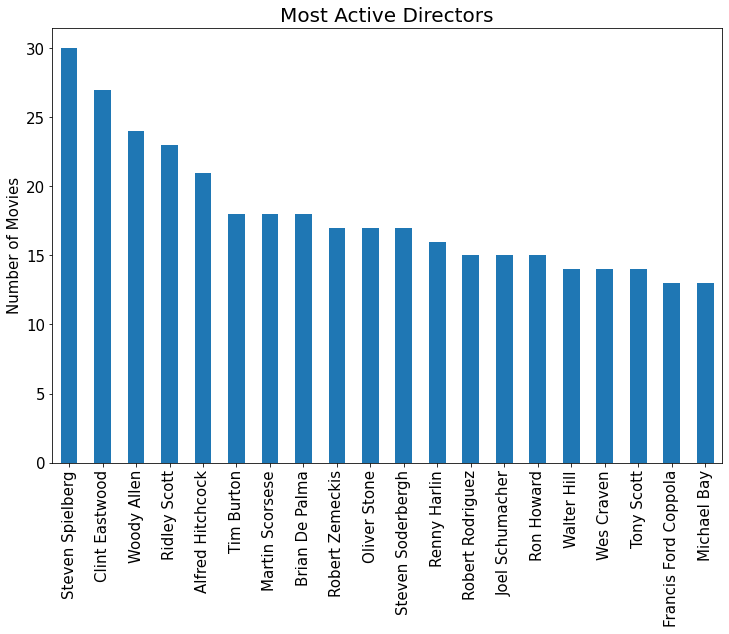

In [144]:
# Total Number of Movies for Director:
plt.figure(figsize = (12, 8))
df.director.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

director
Steven Spielberg   9256.62
Peter Jackson      6528.24
Michael Bay        6437.47
James Cameron      5900.61
David Yates        5334.56
Name: revenue_musd, dtype: float64


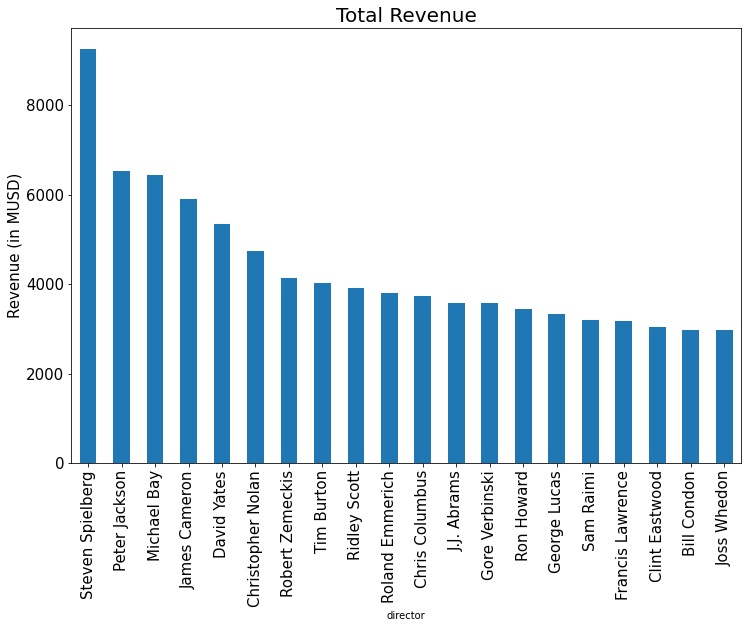

In [158]:
#Total Revenue for Top Dirrector:
print(df.groupby('director').revenue_musd.sum().nlargest(5))
plt.figure(figsize = (12, 8))
df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

director
Aditya Chopra       9.10
Alain Fresnot       9.00
Subodh Bhave        9.00
Kartal Tibet        8.60
Oles Sanin          8.60
Jennie Livingston   8.20
Name: vote_average, dtype: float64


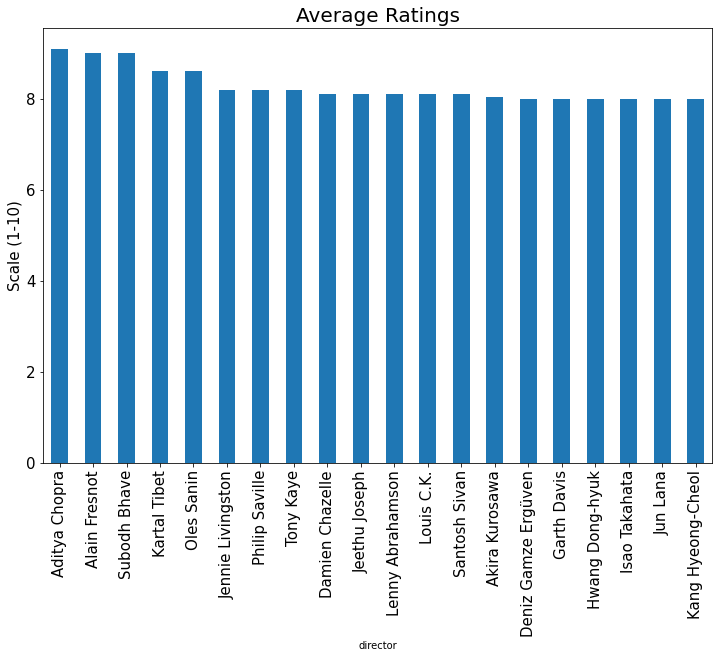

In [162]:
#Mean Ratings for Top Directors:
print(df.groupby('director').vote_average.mean().nlargest(6))
plt.figure(figsize = (12, 8))
df.groupby("director").vote_average.mean().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Average Ratings",fontsize = 20)
plt.ylabel("Scale (1-10)", fontsize = 15)
plt.show()
